In [1]:
cd ..

/playpen-raid1/tgreer/InverseConsistency


In [3]:
import training_scripts.brain_t1_pipeline.train as train

from icon_registration import itk_wrapper
import itk
import matplotlib.pyplot as plt
import torch

In [159]:
net = train.make_network()
weights_path = "/playpen-raid1/tgreer/InverseConsistency/training_scripts/brain_t1_pipeline/results/stripped_rg.05/brain_aligner_resi_net11700"
net.regis_net.load_state_dict(torch.load(weights_path))

<All keys matched successfully>

In [160]:
def preprocess(image):
    #image = itk.CastImageFilter[itk.Image[itk.SS, 3], itk.Image[itk.F, 3]].New()(image)
    image = itk.shift_scale_image_filter(image, shift=0., scale = 1 / 1000)
    image = itk.clamp_image_filter(image, bounds=(0, 1))
    return image


image_A = itk.imread(
    "/playpen-raid2/Data/HCP/HCP_1200/101915/T1w/T1w_acpc_dc_restore_brain.nii.gz")
image_A = preprocess(image_A)
image_B = itk.imread(
    "/playpen-raid2/Data/HCP/HCP_1200/131217/T1w/T1w_acpc_dc_restore_brain.nii.gz")
image_B = preprocess(image_B)


In [161]:
image_A = itk.imread(
    "/playpen-raid2/Data/HCP/HCP_1200/106824/T1w/T1w_acpc_dc_restore_brain.nii.gz")
image_A = preprocess(image_A)
image_B = itk.imread(
    "/playpen-raid2/Data/HCP/HCP_1200/108525/T1w/T1w_acpc_dc_restore_brain.nii.gz")
image_B = preprocess(image_B)


In [162]:
phi_AB, phi_BA = itk_wrapper.register_pair(net, image_A, image_B)

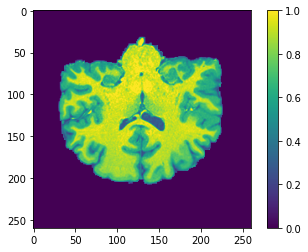

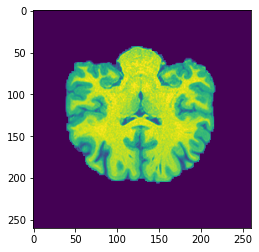

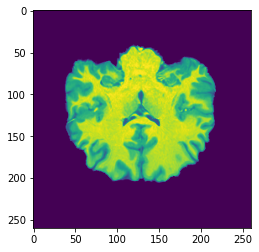

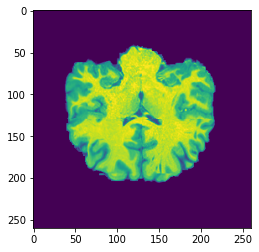

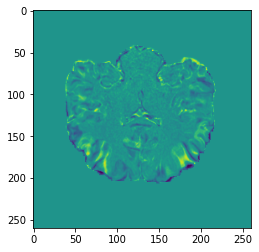

In [163]:
interpolator = itk.LinearInterpolateImageFunction.New(image_A)
warped_image_A = itk.resample_image_filter(image_A, 
    transform=phi_AB, 
    interpolator=interpolator,
    size=itk.size(image_B),
    output_spacing=itk.spacing(image_B),
    output_direction=image_B.GetDirection(),
    output_origin=image_B.GetOrigin()
)

S = 150
plt.imshow(image_A[:, S])
plt.colorbar()
plt.show()
plt.imshow(image_B[:, S])
plt.show()

plt.imshow(warped_image_A[:, S])
plt.show()

plt.imshow(itk.checker_board_image_filter(warped_image_A, image_B)[:, S])
plt.show()

plt.imshow(itk.subtract_image_filter(warped_image_A, image_B)[:, S])


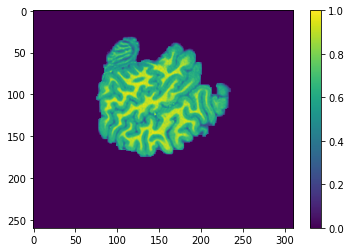

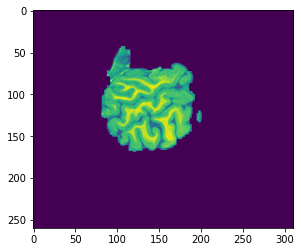

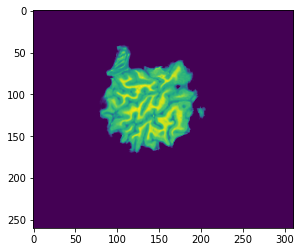

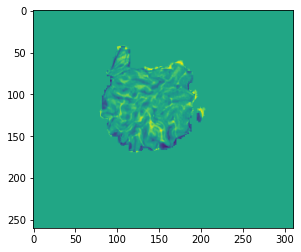

In [164]:
S = 205
plt.imshow(image_A[:, :, S])
plt.colorbar()
plt.show()
plt.imshow(image_B[:, :, S])
plt.show()

plt.imshow(warped_image_A[:, :, S])
plt.show()

#plt.imshow(itk.checker_board_image_filter(warped_image_A, image_B)[:, 90])
#plt.show()

plt.imshow(itk.subtract_image_filter(warped_image_A, image_B)[:,:, S])

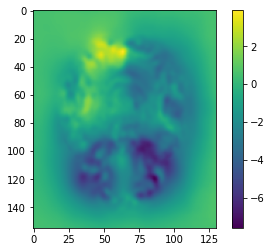

In [167]:
vf = phi_AB.GetNthTransform(1).GetParameters()
plt.imshow(np.array(vf).reshape(130, 155, 130, 3)[40, :, :, 2])
plt.colorbar()

In [168]:
import pickle
import numpy as np
#with open("training_scripts/brain_t1_pipeline/results/brain_train-1/loss_curve", "rb") as f:
with open("training_scripts/brain_t1_pipeline/results/stripped_rg.05/loss_curve", "rb") as f:
    curve2 = pickle.load(f)
with open("training_scripts/brain_t1_pipeline/results/stripped_rg.05/loss_curve", "rb") as f:
    curve2 = pickle.load(f)

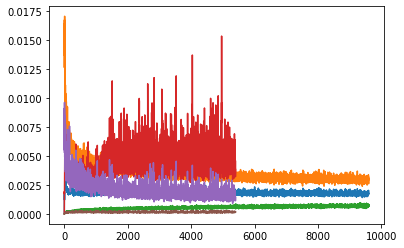

In [135]:
c = np.array([x[:3] for x in curve])
plt.plot(c)
c = np.array([x[:3] for x in curve2])
plt.plot(c)

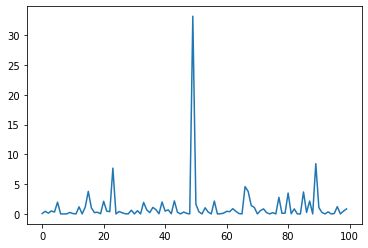

In [140]:
c = np.array([torch.mean(x[3].cpu()).item() for x in curve2])
plt.plot(c[-100:])

In [141]:
[torch.mean(x[3].cpu()).item() for x in curve2][-50:]

[1.625,
 0.34375,
 0.0,
 1.03125,
 0.3125,
 0.0,
 2.15625,
 0.0,
 0.03125,
 0.125,
 0.4375,
 0.375,
 0.875,
 0.4375,
 0.0625,
 0.0,
 4.59375,
 3.78125,
 1.40625,
 1.09375,
 0.0,
 0.5625,
 0.84375,
 0.21875,
 0.0,
 0.21875,
 0.0,
 2.78125,
 0.09375,
 0.125,
 3.5,
 0.03125,
 0.84375,
 0.0,
 0.0,
 3.6875,
 0.25,
 2.15625,
 0.0,
 8.4375,
 1.0625,
 0.25,
 0.0,
 0.34375,
 0.0,
 0.0625,
 1.21875,
 0.0,
 0.46875,
 0.84375]

In [150]:
At = torch.tensor(np.array(image_A))[None, None]

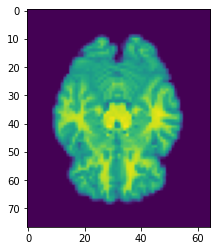

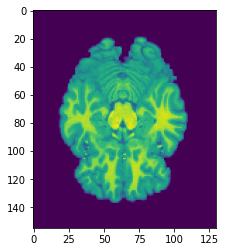

In [158]:
import torch.nn.functional as F
plt.imshow(F.avg_pool3d(At, 4)[0, 0, 20])
plt.show()
plt.imshow(F.avg_pool3d(At, 2)[0, 0, 40])